In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
model = load_model("facial_EmotionClassifer.h5")


In [4]:
Img_size = 48

'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


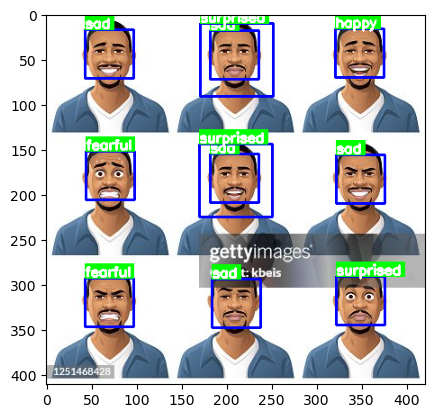

In [8]:
def emotion(frame):
    image = cv.resize(frame, (Img_size, Img_size))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image, axis=0)
    y_pred= model.predict(image)
    yhat = np.argmax(y_pred)
    class_labels = ['angry', 'disgusted','fearful','happy','neutral', 'sad','surprised' ]
    label = class_labels[yhat]
    return label
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
input_image = "D:/college/semple/young-man.jpg"
frame = cv.imread(input_image)

grayImg = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(grayImg, 1.5, 3)
for (x,y,w,h) in faces:
    cv.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2)
    face_img = frame[y:y+h, x:x+w]
    label = emotion(face_img)
    font = cv.FONT_HERSHEY_SIMPLEX
    (text_width,text_height),_ = cv.getTextSize(label, font, 0.5, 2)
    x=x
    y =y-2
    padding = 2

    cv.rectangle(frame,(x,y-text_height-padding),(x+text_width+padding, y+padding), (0,255,0),-1)
    cv.putText(frame, label, (x, y), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)

# save predicted image 
cv.imwrite("predictedImg.jpg", frame)  
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(frame)
cv.destroyAllWindows()

